# Deep Learning Assignment 1
## Q1: Implement a Neural Network to Solve the XOR Problem
Design and train a simple feedforward neural network from scratch to solve the XOR 
classification problem.
- Input: Two binary inputs
- Output: Single binary output (0 or 1) indicating the XOR of the inputs
- Constraints:
 - Do not use any deep learning or machine learning libraries
 - You must implement the forward pass, backward pass (backpropagation), and weight 
update manually
 - Visualize the training loss
Hint:
- Use a 2-2-1 architecture (2 input neurons, 2 hidden neurons, 1 output neuron)
- Use sigmoid activation function
- When using sigmoid, remember its derivative:
sigmoid'(x) = sigmoid(x) * (1 – sigmoid(x))
- Use binary cross-entropy loss
- Choose a small learning rate (e.g., 0.1). Too large will diverge; too small will be slow.
- Train for at least 10,000 iterations or until the loss plateaus.
- Initialize weights randomly and train using gradient descent

Iteration 0, Loss: 0.7756117226753069
Iteration 1000, Loss: 0.4932057753542367
Iteration 2000, Loss: 0.03349340124763314
Iteration 3000, Loss: 0.014388346374270928
Iteration 4000, Loss: 0.009047175224873276
Iteration 5000, Loss: 0.006571230151668154
Iteration 6000, Loss: 0.005149615463514846
Iteration 7000, Loss: 0.004229295219009638
Iteration 8000, Loss: 0.0035857361232033763
Iteration 9000, Loss: 0.0031108231891943746


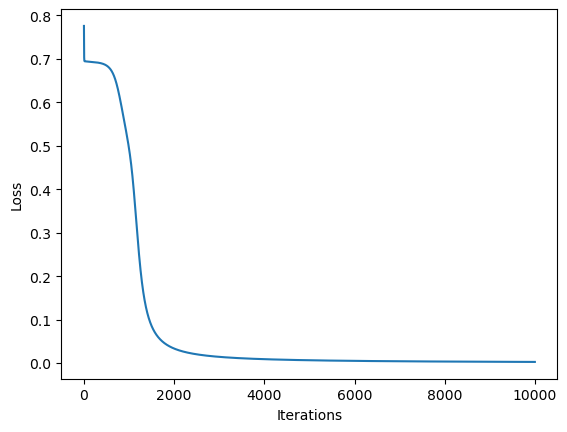

Input: [0 0], Predicted Output: [0.003], Target: 0
Input: [0 1], Predicted Output: [0.998], Target: 1
Input: [1 0], Predicted Output: [0.998], Target: 1
Input: [1 1], Predicted Output: [0.003], Target: 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_loss_derivative(y_true, y_pred):
    return -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_neurons = 2
hidden_neurons = 2
output_neurons = 1
learning_rate = 0.1
iterations = 10000

np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

loss_history = []

for i in range(iterations):
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    loss = binary_cross_entropy_loss(y, predicted_output)
    loss_history.append(loss)

    error_output_layer = binary_cross_entropy_loss_derivative(y, predicted_output) * sigmoid_derivative(predicted_output)
    error_hidden_layer = np.dot(error_output_layer, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, error_output_layer)
    bias_output -= learning_rate * np.sum(error_output_layer, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X.T, error_hidden_layer)
    bias_hidden -= learning_rate * np.sum(error_hidden_layer, axis=0, keepdims=True)

    if i % 1000 == 0:
        print(f"Iteration {i}, Loss: {loss}")

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

for input_data, target in zip(X, y):
    hidden_layer_activation = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)
    print(f"Input: {input_data}, Predicted Output: {np.round(predicted_output[0], 3)}, Target: {target[0]}")

## Q2: Predict If the Game Was Played Using a Neural Network (From Scratch)

| id | Dry Weather | Low Temp | Homework Done | Team Members | Equipment | Ground | Sum | Played |
|----|-------------|----------|---------------|--------------|-----------|--------|-----|--------|
| 1  | 1           | 1        | 1             | 1            | 0         | 1      | 5   | 1      |
| 2  | 1           | 1        | 1             | 1            | 1         | 1      | 6   | 1      |
| 3  | 1           | 1        | 1             | 1            | 1         | 1      | 6   | 1      |
| 4  | 0           | 1        | 0             | 1            | 1         | 1      | 4   | 0      |
| 5  | 0           | 0        | 1             | 1            | 1         | 0      | 3   | 0      |
| 6  | 0           | 0        | 0             | 0            | 0         | 1      | 1   | 0      |


NOTE: (Don’t consider Sum as a feature)
You are given a dataset with binary input conditions (e.g., weather, preparation, equipment)
and a label indicating whether the game was played.
Task:
- Design a neural network from scratch to predict the 'Played' output using the input 
conditions
- Do not use any deep learning libraries
- Implement forward propagation, loss calculation, backpropagation, and parameter 
updates manually
- Report accuracy and training loss over iterations
Hint:
- Input Layer: 6 neurons (for each binary feature)
- Hidden Layer: Start with 3 to 5 neurons and use sigmoid/ReLU activation
- Output Layer: 1 neuron with sigmoid activation (for binary classification)
- Loss Function: Binary Cross-Entropy

Iteration 0, Loss: 0.9485262820674646
Iteration 1000, Loss: 0.005088070715926866
Iteration 2000, Loss: 0.002320154202406132
Iteration 3000, Loss: 0.0014892670011494794
Iteration 4000, Loss: 0.0010922278288518976
Iteration 5000, Loss: 0.0008602181912573961
Iteration 6000, Loss: 0.00070822289991522
Iteration 7000, Loss: 0.0006009809242277736
Iteration 8000, Loss: 0.0005212631155850585
Iteration 9000, Loss: 0.00045966256855680185


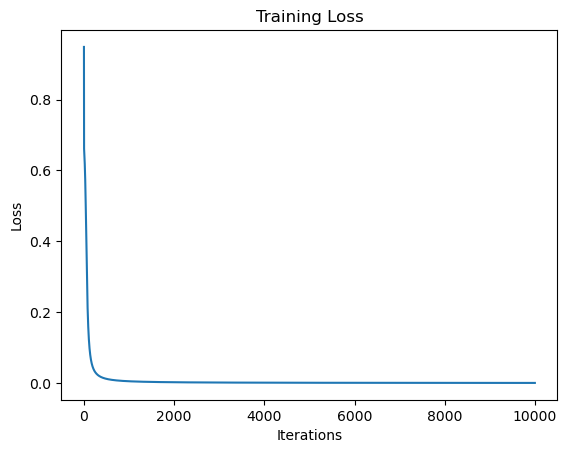

Final Accuracy: 50.00%
Predicted Outputs: [array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([0.])]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_loss_derivative(y_true, y_pred):
    return -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

data = np.array([
    [1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1],
    [0, 1, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

labels = np.array([[1], [1], [1], [0], [0], [0]])

input_neurons = 6
hidden_neurons = 4
output_neurons = 1
learning_rate = 0.1
iterations = 10000

np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

loss_history = []

for i in range(iterations):
    hidden_layer_activation = np.dot(data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    loss = binary_cross_entropy_loss(labels, predicted_output)
    loss_history.append(loss)

    error_output_layer = binary_cross_entropy_loss_derivative(labels, predicted_output) * sigmoid_derivative(predicted_output)
    error_hidden_layer = np.dot(error_output_layer, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, error_output_layer)
    bias_output -= learning_rate * np.sum(error_output_layer, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(data.T, error_hidden_layer)
    bias_hidden -= learning_rate * np.sum(error_hidden_layer, axis=0, keepdims=True)

    if i % 1000 == 0:
        print(f"Iteration {i}, Loss: {loss}")

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

predictions = []
for input_data in data:
    hidden_layer_activation = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)
    predictions.append(np.round(predicted_output[0], 3))

accuracy = np.mean((np.round(predicted_output) == labels.flatten()))
print(f"Final Accuracy: {accuracy * 100:.2f}%")
print(f"Predicted Outputs: {predictions}")